In [ ]:
"""
# Text Classification: Deep Learning Recurrent Neural Networks RNN
Notebook Content
1. Preparing the Environment
   Importing Libraries
   Importing Datasets
2. Simply Explained: Support Vector Machine
3. Data Overview
   Frequency Distributions with NLTK
4. Data Preprocessing
   Cleaning Links
   Cleaning Everything Except Alphabetical and Numerical Characters
   Tokenizing and Lemmatizing
   Removing Stopwords
   Joining Prepared Strings
   Bag of Words Approach
5. Recurrent Neural Networks Modeling
   Fitting RNN Model
   Testing Model
6. Conclusion
"""


# https://www.kaggle.com/wafafaisal7/text-classification-recurrent-neural-network-rnn/notebook

In [1]:
# Preparing the Environment
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re

In [4]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ba5c20591d58ca2e4256307140b11fa3b44c69e9cb14b6d5c112db02eaca086c
  Stored in directory: c:\users\18572\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random

def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    random.seed(1)

# creating some random data
reset_random_seeds()

In [6]:
train_set = pd.read_csv('C:/Users/18572/Documents/NLP_Corona_TextClassification/Corona_NLP_train.csv',encoding="latin1")
test_set = pd.read_csv('C:/Users/18572/Documents/NLP_Corona_TextClassification/Corona_NLP_test.csv',encoding="latin1")

train_set.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
"""
Data Overview
In this section we will take a look at the data. And in order to do this we will use frequency distrubutions of NLTK.

First let's drop unrelevant features"""

In [7]:
unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]

train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
# Now let's split sentences as their class, Positive,Neutral and Negative.
train_set["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [9]:
positives = train_set[(train_set["Sentiment"] == "Positive") | (train_set["Sentiment"] == "Extremely Positive")]
positives_test = test_set[(test_set["Sentiment"] == "Positive") | (test_set["Sentiment"] == "Extremely Positive")]
print(positives["Sentiment"].value_counts())
positives.head()

Positive              11422
Extremely Positive     6624
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive


In [10]:
negatives = train_set[(train_set["Sentiment"] == "Negative") | (train_set["Sentiment"] == "Extremely Negative")]
negatives_test = test_set[(test_set["Sentiment"] == "Negative") | (test_set["Sentiment"] == "Extremely Negative")]
print(negatives["Sentiment"].value_counts())
negatives.head()

Negative              9917
Extremely Negative    5481
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
9,"For corona prevention,we should stop to buy th...",Negative
20,with 100 nations inficted with covid 19 th...,Extremely Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative


In [11]:
neutrals = train_set[train_set["Sentiment"] == "Neutral"]
neutrals_test = test_set[test_set["Sentiment"] == "Neutral"]
print(neutrals["Sentiment"].value_counts())
neutrals.head()

Neutral    7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,Was at the supermarket today. Didn't buy toile...,Neutral
10,All month there hasn't been crowding in the su...,Neutral
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral


In [12]:
#Now let's convert labels into integers, I will label negatives as 0, neutrals as 1 and positives as 2
import warnings as wrn
wrn.filterwarnings('ignore')

negatives["Sentiment"] = 0 
negatives_test["Sentiment"] = 0

positives["Sentiment"] = 2
positives_test["Sentiment"] = 2

neutrals["Sentiment"] = 1
neutrals_test["Sentiment"] = 1

negatives.head()

,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",0
9,"For corona prevention,we should stop to buy th...",0
20,with 100 nations inficted with covid 19 th...,0
24,@10DowningStreet @grantshapps what is being do...,0
26,In preparation for higher demand and a potenti...,0


In [13]:
# Now I will concatenate train and test, I will split them after processing.
data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          44955 non-null  int64 
 1   OriginalTweet  44955 non-null  object
 2   Sentiment      44955 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
data.head()

In [15]:
# Finally everything is ready, we can start examining data with examining random texts.
import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["OriginalTweet"][random_ind]),end="\nLabel: ")
    print(str(data["Sentiment"][random_ind]),end="\n\n")

Support food banks don t panic buy and be responsible
Label: 2

The post-shower feeling has never felt better than during the #COVID19 #coronavirus pandemic. Particularly after coming home from the grocery store. ? the ? away
Label: 0

ÂWe need much less than we think we need.Â
ÂMaya Angelou

Please shop responsibly, for the sake of everyone.

#coronavirus #supermarket #stockpiling #CoronaCrisis https://t.co/z2BCCMjKLL https://t.co/k8ebcNqKsS
Label: 2

"STAY SAFE ? STAY INSIDE ?"

 Download the app and get 50% off on your first medicine order
Install now-https://t.co/Esw4D03FPO

Hurry ! Limited time only
#coronavirus #covid19 #sanitizer #handsanitizer #Quarantine #lockdown #fighttogether #stayathome #staysafe #belgavi *tnc https://t.co/y4Cp55W24m
Label: 2

I found this useful from Dr Martin Blaser who is a Professor of Infectious diseases answering frank and practical questions on Covid-19, like what to clean the kitchen with, can you catch Covid-19 from clothes? How should we behav

In [16]:
# And let's take a look at the frequency distributions.
positiveFD = nltk.FreqDist(word for text in data[data["Sentiment"] == 2]["OriginalTweet"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in data[data["Sentiment"] == 0]["OriginalTweet"] for word in text.lower().split())
neutralDF = nltk.FreqDist(word  for text in data[data["Sentiment"] == 1]["OriginalTweet"] for word in text.lower().split())

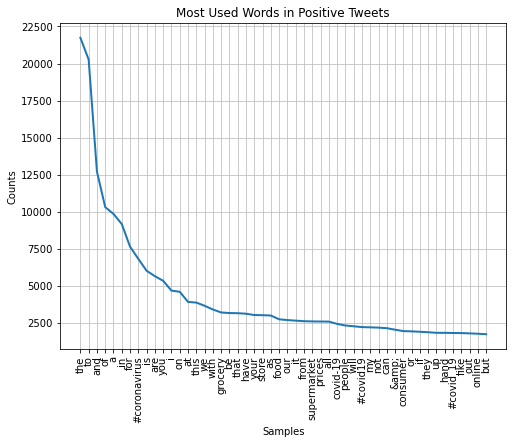

In [17]:
# And now we can examine most used words plots.
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Tweets")
positiveFD.plot(50)
plt.show()

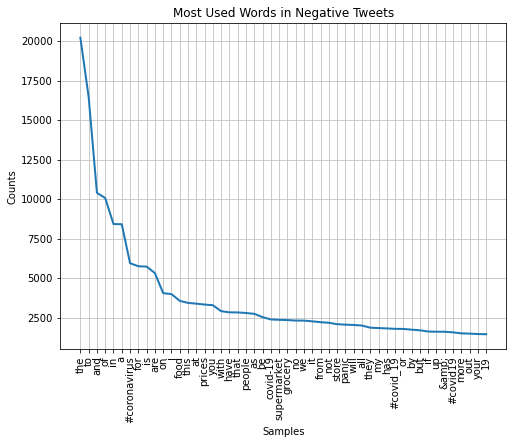

In [18]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Tweets")
negativeFD.plot(50)
plt.show()

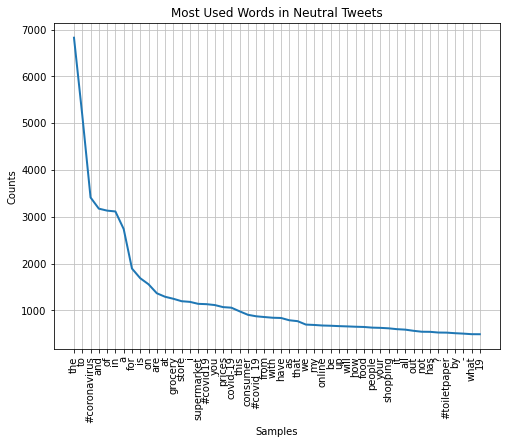

In [19]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Tweets")
neutralDF.plot(50)
plt.show()

In [ ]:
# Although most of the words are same (we say them stopwords [words that not have a special meaning]) 
# we can see characteristic words such as panic

In [ ]:
"""Data Preprocessing
In this section we will prepare the dataset in order to use in RNN model. Before starting I want to explain processes with 1 line explanations

1. Cleaning Links: We'll clean all website links using regular expressions
2. Cleaning Everything Except Alphabetical and Numerical Characters: We'll clean unrelevant digits using regular expressions
3. Tokenizing and Lemmatizing: We'll split texts into their words and convert words to their base form (dogs=>dog)
4. Removing Stopwords: We'll remove words that have no special meaning (such as the,will,was)
5. Joining Prepared Strings: We'll join the words
6. Bag of Words Approach: We'll create a bag of word. In bag of words approach each feature shows whether the text contains the word or not. 
For instance if our text contains grocery word, its grocery feature will be 1 if not it will be 0."""

In [23]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18572\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18572\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [24]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["OriginalTweet"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

In [25]:
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order

coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak

food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral

news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report

cashier grocery store wa sharing insight covid 19 prove credibility commented civics class know talking



In [26]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)
y=np.asarray(data["Sentiment"])

In [28]:
# Everything is ready, we can split our set into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33716, 10000)
(11239, 10000)
(33716,)
(11239,)


In [27]:
"""
Deep Learning Modeling - Recurrent Neural Network
Everything is ready, now ve can fit our classifier.
"""

'\nDeep Learning Modeling - Recurrent Neural Network\nEverything is ready, now ve can fit our classifier.\n'

In [29]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from keras.callbacks import ModelCheckpoint

In [30]:
y = np.array(data['Sentiment'])
data = np.array(cleanedData)

In [31]:
labels=tf.keras.utils.to_categorical(y, 5,dtype ="int32")


tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

sequences = tokenizer.texts_to_sequences(data)
text = pad_sequences(sequences)


num_words = len(tokenizer.word_index) + 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, labels, train_size=0.75, test_size=0.25, random_state=3)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33716, 48)
(11239, 48)
(33716, 5)
(11239, 5)


In [33]:
reset_random_seeds() 
model1 = Sequential()

model1.add(layers.Embedding(num_words, 1000))
model1.add(layers.SimpleRNN(128,dropout=0.9))
model1.add(Dropout(0.09))
model1.add(Dropout(0.05))
model1.add(layers.Dense(5,activation='softmax'))

#-----------------------------------------------------------------------------------------
model1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['acc'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_acc', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, batch_size= 90,epochs=20,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/20
375/375 [==============================] - ETA: 0s - loss: 1.0546 - acc: 0.4358
Epoch 00001: val_acc improved from -inf to 0.53047, saving model to best_model1.hdf5
375/375 [==============================] - 103s 270ms/step - loss: 1.0546 - acc: 0.4358 - val_loss: 0.9475 - val_acc: 0.5305
Epoch 2/20
375/375 [==============================] - ETA: 0s - loss: 0.8665 - acc: 0.6060
Epoch 00002: val_acc improved from 0.53047 to 0.60904, saving model to best_model1.hdf5
375/375 [==============================] - 97s 257ms/step - loss: 0.8665 - acc: 0.6060 - val_loss: 0.9035 - val_acc: 0.6090
Epoch 3/20
375/375 [==============================] - ETA: 0s - loss: 0.7120 - acc: 0.7072
Epoch 00003: val_acc improved from 0.60904 to 0.73085, saving model to best_model1.hdf5
375/375 [==============================] - 98s 260ms/step - loss: 0.7120 - acc: 0.7072 - val_loss: 0.6571 - val_acc: 0.7308
Epoch 4/20
375/375 [==============================] - ETA: 0s - loss: 0.6298 - acc: 0.7491
Ep

In [ ]:
"""
Conclusion
This kernel I have developed a text classifier using RNN. However, RNN achieve good accuracy with 80.76%, RNN is great to analyze sequence data.
"""